In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time

In [2]:
from sklearn import metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris, load_diabetes
from sklearn.decomposition import PCA, FastICA
from sklearn.random_projection import GaussianRandomProjection

In [3]:
from warnings import simplefilter

In [4]:
simplefilter(action="ignore", category=FutureWarning)

In [5]:
iris = load_iris()
diabetes = load_diabetes()

In [6]:
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris.data)
diabetes_scaled = scaler.fit_transform(diabetes.data)

In [7]:
iris_X_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(
    iris_scaled, iris.target, test_size=0.3, random_state=42
)
diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = train_test_split(
    diabetes_scaled, diabetes.target, test_size=0.3, random_state=42
)

In [8]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import numpy as np

In [9]:
def evaluate_clusters(X, labels):
    silhouette = silhouette_score(X, labels)
    calinski = calinski_harabasz_score(X, labels)
    return silhouette, calinski

In [10]:
def apply_clustering(X_train, X_test, y_train, y_test, name, max_clusters=10):
    print(f"Applying clustering to {name} dataset")
    kmeans_scores = []
    em_scores = []
    for n_clusters in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans_labels = kmeans.fit_predict(X_train)
        kmeans_silhouette, kmeans_calinski = evaluate_clusters(X_train, kmeans_labels)
        kmeans_scores.append((n_clusters, kmeans_silhouette, kmeans_calinski))
        em = GaussianMixture(n_components=n_clusters, random_state=42)
        em_labels = em.fit_predict(X_train)
        em_silhouette, em_calinski = evaluate_clusters(X_train, em_labels)
        em_scores.append((n_clusters, em_silhouette, em_calinski))
    optimal_kmeans_sil = max(kmeans_scores, key=lambda x: x[1])[0]
    optimal_em_sil = max(em_scores, key=lambda x: x[1])[0]
    optimal_kmeans_cal = max(kmeans_scores, key=lambda x: x[2])[0]
    optimal_em_cal = max(em_scores, key=lambda x: x[2])[0]
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
    ax1.plot(
        [s[0] for s in kmeans_scores],
        [s[1] for s in kmeans_scores],
        "bo-",
        label="K-means",
    )
    ax1.plot([s[0] for s in em_scores], [s[1] for s in em_scores], "ro-", label="EM")
    ax1.set_xlabel("Number of clusters")
    ax1.set_ylabel("Silhouette Score")
    ax1.set_title(f"{name} - Silhouette Score vs Number of Clusters")
    ax1.legend()
    ax1.axvline(
        x=optimal_kmeans_sil, color="b", linestyle="--", label="K-means optimal"
    )
    ax1.axvline(x=optimal_em_sil, color="r", linestyle="--", label="EM optimal")
    ax1.legend()
    ax2.plot(
        [s[0] for s in kmeans_scores],
        [s[2] for s in kmeans_scores],
        "bo-",
        label="K-means",
    )
    ax2.plot([s[0] for s in em_scores], [s[2] for s in em_scores], "ro-", label="EM")
    ax2.set_xlabel("Number of clusters")
    ax2.set_ylabel("Calinski-Harabasz Score")
    ax2.set_title(f"{name} - Calinski-Harabasz Score vs Number of Clusters")
    ax2.legend()
    ax2.axvline(
        x=optimal_kmeans_cal, color="b", linestyle="--", label="K-means optimal"
    )
    ax2.axvline(x=optimal_em_cal, color="r", linestyle="--", label="EM optimal")
    ax2.legend()
    plt.tight_layout()
    plt.show()
    print(f"Optimal number of clusters for K-means (Silhouette): {optimal_kmeans_sil}")
    print(f"Optimal number of clusters for EM (Silhouette): {optimal_em_sil}")
    print(
        f"Optimal number of clusters for K-means (Calinski-Harabasz): {optimal_kmeans_cal}"
    )
    print(f"Optimal number of clusters for EM (Calinski-Harabasz): {optimal_em_cal}")
    kmeans = KMeans(n_clusters=optimal_kmeans_sil, random_state=42)
    em = GaussianMixture(n_components=optimal_em_sil, random_state=42)
    kmeans.fit(X_train)
    em.fit(X_train)
    return kmeans, em

Applying clustering to Iris dataset


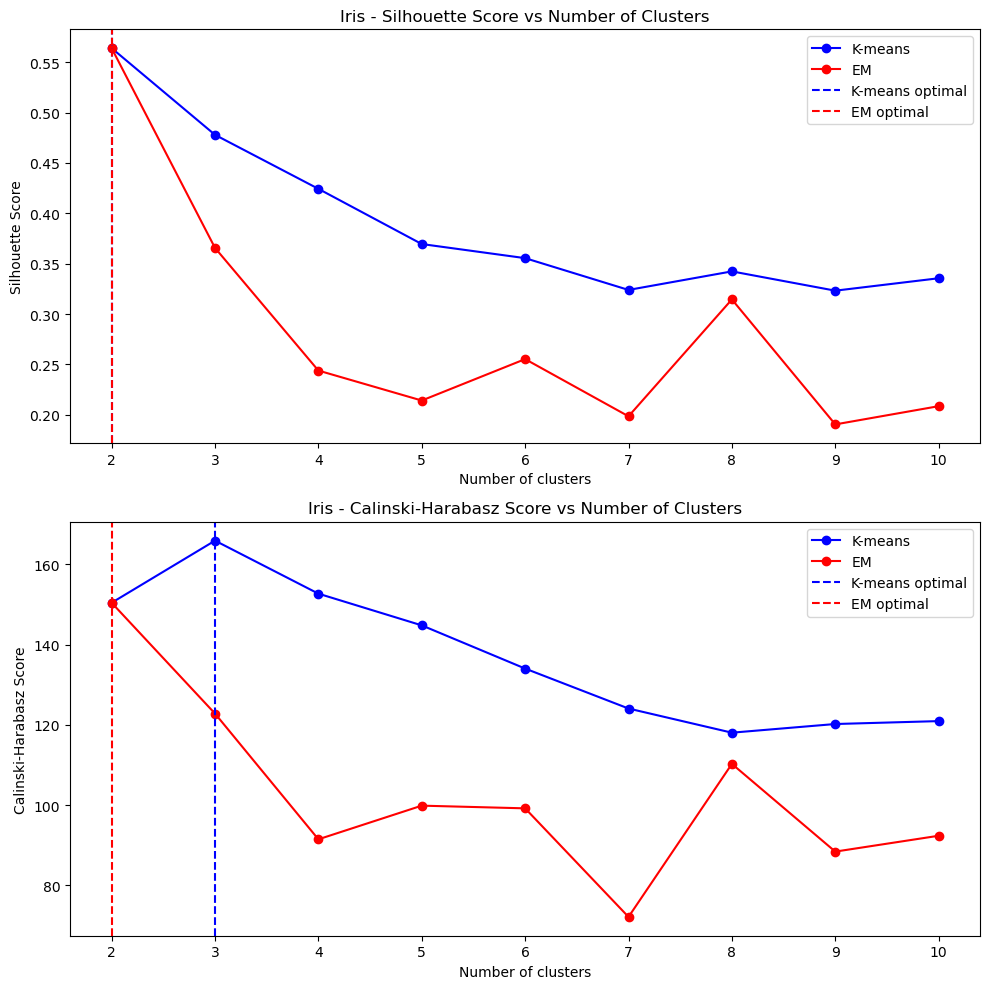

Optimal number of clusters for K-means (Silhouette): 2
Optimal number of clusters for EM (Silhouette): 2
Optimal number of clusters for K-means (Calinski-Harabasz): 3
Optimal number of clusters for EM (Calinski-Harabasz): 2
Applying clustering to Diabetes dataset


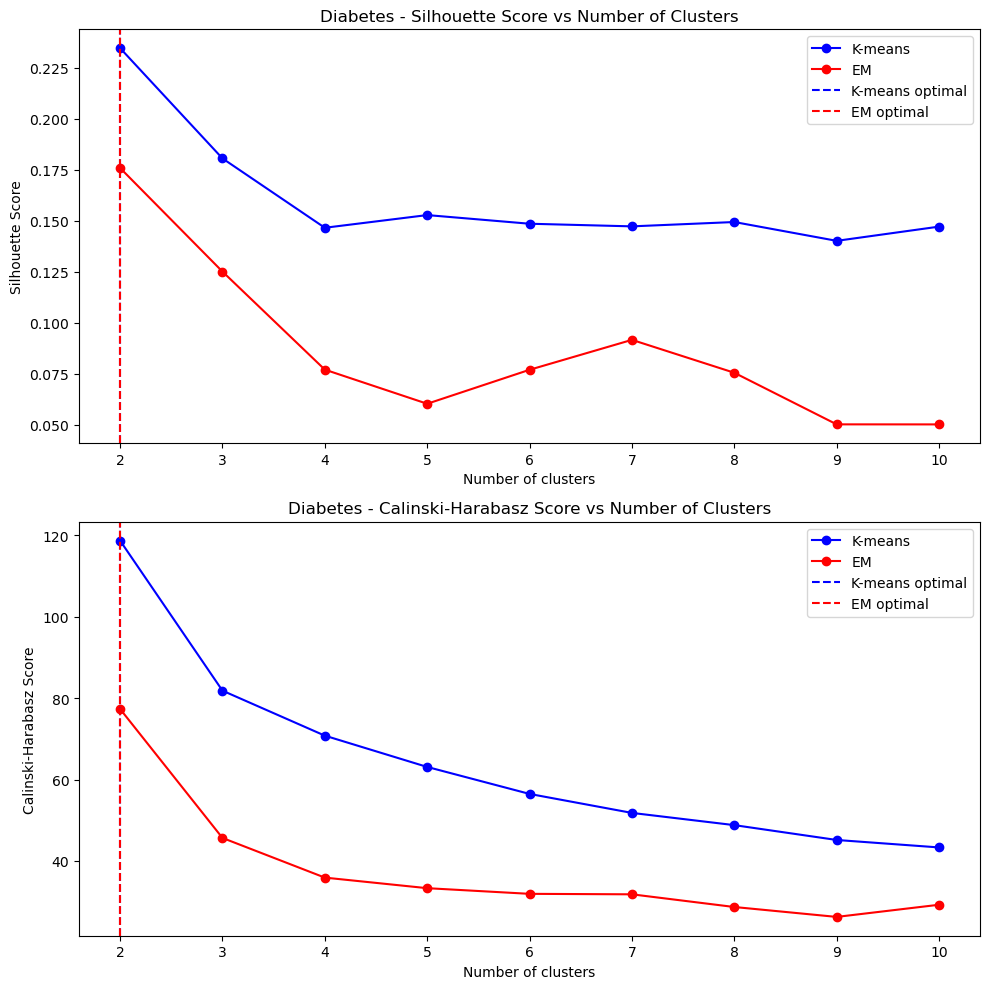

Optimal number of clusters for K-means (Silhouette): 2
Optimal number of clusters for EM (Silhouette): 2
Optimal number of clusters for K-means (Calinski-Harabasz): 2
Optimal number of clusters for EM (Calinski-Harabasz): 2


In [11]:
iris_kmeans, iris_em = apply_clustering(
    iris_X_train, iris_X_test, iris_y_train, iris_y_test, "Iris"
)
diabetes_kmeans, diabetes_em = apply_clustering(
    diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test, "Diabetes"
)

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kurtosis
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FastICA
from sklearn.random_projection import GaussianRandomProjection

In [13]:
def reconstruction_error(X, X_reduced, rp):
    X_reconstructed = np.dot(X_reduced, rp.components_)
    return np.mean(np.square(X - X_reconstructed))

In [14]:
def apply_dim_reduction(X, name, max_components=10):
    print(f"\nApplying dimensionality reduction to {name} dataset")
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    pca = PCA(random_state=42)
    pca.fit(X_scaled)
    eigenvalues = pca.explained_variance_
    cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
    ica_kurtosis = []
    for n_components in range(2, min(max_components, X_scaled.shape[1]) + 1):
        ica = FastICA(n_components=n_components, random_state=42)
        ica_train = ica.fit_transform(X_scaled)
        ica_kurtosis.append(np.mean(np.abs(kurtosis(ica_train))))
    rp_errors = []
    for n_components in range(2, min(max_components, X_scaled.shape[1]) + 1):
        rp = GaussianRandomProjection(n_components=n_components, random_state=42)
        rp_train = rp.fit_transform(X_scaled)
        rp_errors.append(reconstruction_error(X_scaled, rp_train, rp))
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))
    axs[0, 0].plot(range(1, len(eigenvalues) + 1), eigenvalues)
    axs[0, 0].set_xlabel("Number of components")
    axs[0, 0].set_ylabel("Eigenvalues")
    axs[0, 0].set_title(f"{name} - PCA Eigenvalues")
    axs[0, 1].plot(
        range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio
    )
    axs[0, 1].set_xlabel("Number of components")
    axs[0, 1].set_ylabel("Cumulative explained variance ratio")
    axs[0, 1].set_title(f"{name} - PCA Cumulative Explained Variance Ratio")
    axs[1, 0].plot(range(2, min(max_components, X_scaled.shape[1]) + 1), ica_kurtosis)
    axs[1, 0].set_xlabel("Number of components")
    axs[1, 0].set_ylabel("Mean Kurtosis")
    axs[1, 0].set_title(f"{name} - ICA Mean Kurtosis")
    axs[1, 1].plot(range(2, min(max_components, X_scaled.shape[1]) + 1), rp_errors)
    axs[1, 1].set_xlabel("Number of components")
    axs[1, 1].set_ylabel("Reconstruction Error")
    axs[1, 1].set_title(f"{name} - RP Reconstruction Error")
    plt.tight_layout()
    plt.show()
    optimal_pca = np.argmax(cumulative_variance_ratio >= 0.95) + 1
    optimal_ica = np.argmax(ica_kurtosis) + 2
    optimal_rp = np.argmin(rp_errors) + 2
    print(f"Optimal number of components for PCA: {optimal_pca}")
    print(f"Optimal number of components for ICA: {optimal_ica}")
    print(f"Optimal number of components for RP: {optimal_rp}")
    pca = PCA(n_components=optimal_pca, random_state=42)
    ica = FastICA(n_components=optimal_ica, random_state=42)
    rp = GaussianRandomProjection(n_components=optimal_rp, random_state=42)
    pca_train = pca.fit_transform(X_scaled)
    ica_train = ica.fit_transform(X_scaled)
    rp_train = rp.fit_transform(X_scaled)
    return (pca, pca_train), (ica, ica_train), (rp, rp_train)


Applying dimensionality reduction to Iris dataset


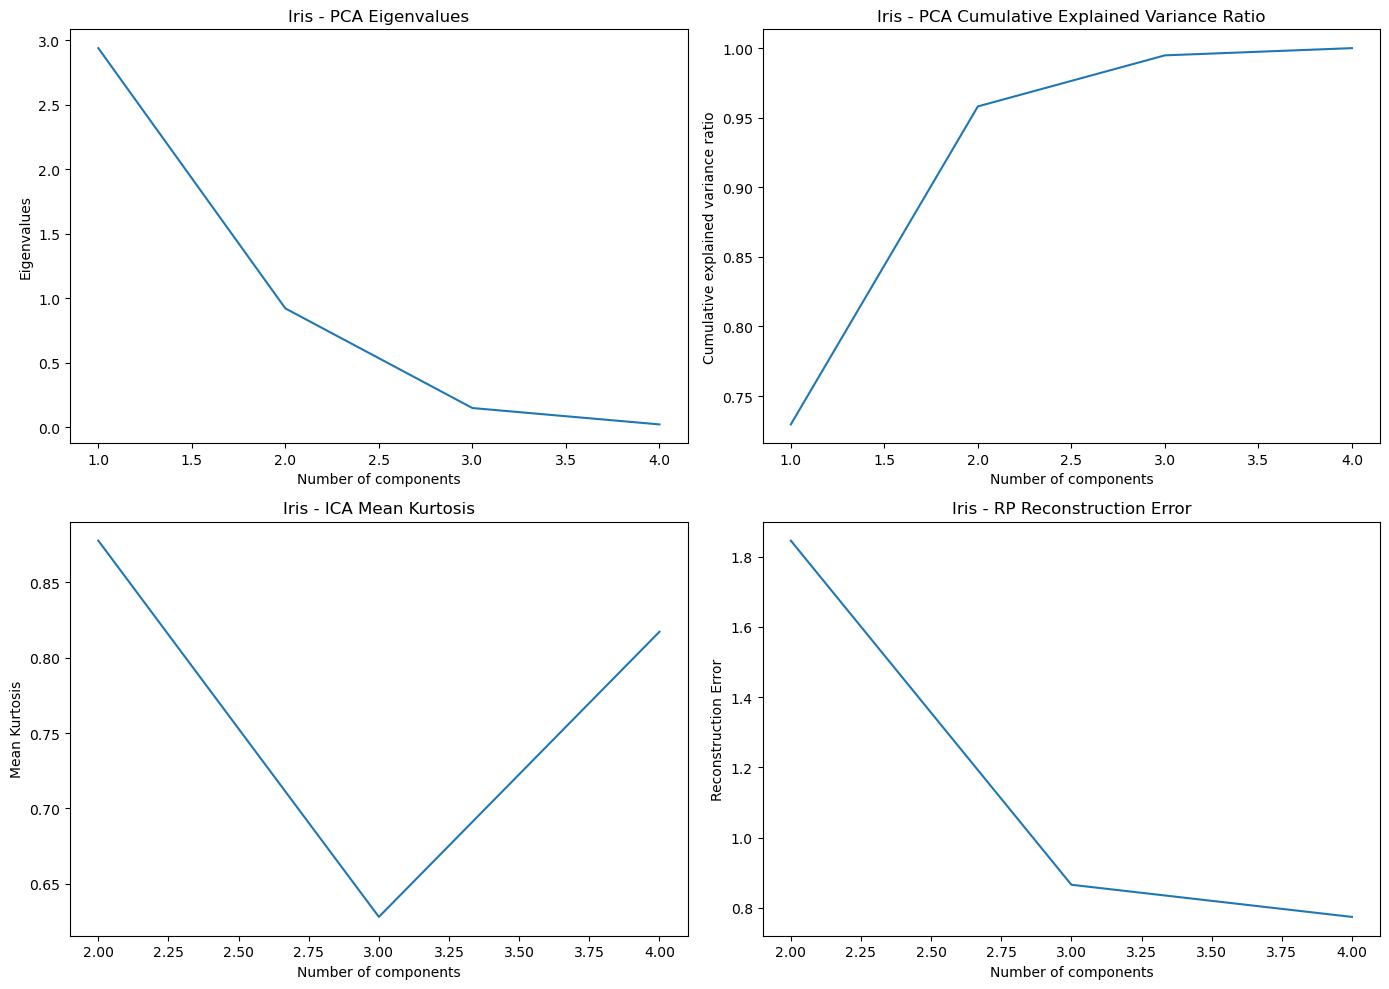

Optimal number of components for PCA: 2
Optimal number of components for ICA: 2
Optimal number of components for RP: 4

Applying dimensionality reduction to Diabetes dataset


/opt/homebrew/Caskroom/miniconda/base/envs/networkscience/lib/python3.12/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/networkscience/lib/python3.12/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/networkscience/lib/python3.12/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/networkscience/lib/python3.12/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of itera

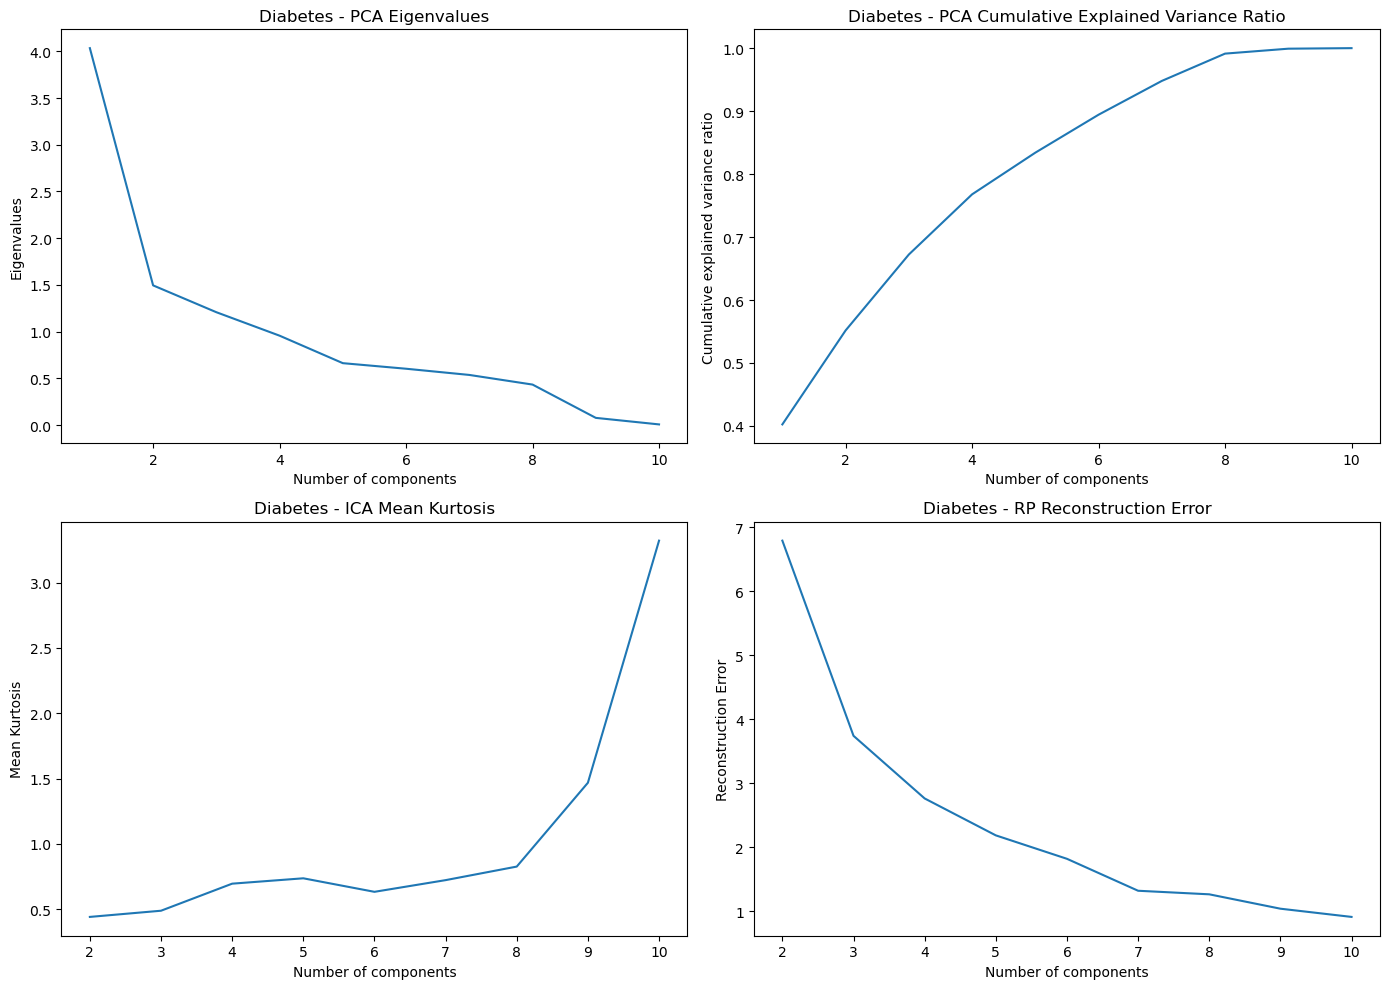

Optimal number of components for PCA: 8
Optimal number of components for ICA: 10
Optimal number of components for RP: 10


/opt/homebrew/Caskroom/miniconda/base/envs/networkscience/lib/python3.12/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


In [15]:
iris_pca, iris_ica, iris_rp = apply_dim_reduction(iris.data, "Iris")
diabetes_pca, diabetes_ica, diabetes_rp = apply_dim_reduction(diabetes.data, "Diabetes")

In [16]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [17]:
def apply_clustering(X, name, max_clusters=10):
    kmeans_silhouette = []
    kmeans_calinski = []
    EM_silhouette = []
    EM_calinski = []
    for n_clusters in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans_labels = kmeans.fit_predict(X)
        kmeans_silhouette.append(silhouette_score(X, kmeans_labels))
        kmeans_calinski.append(calinski_harabasz_score(X, kmeans_labels))
        EM = GaussianMixture(n_components=n_clusters, random_state=42)
        EM_labels = EM.fit_predict(X)
        EM_silhouette.append(silhouette_score(X, EM_labels))
        EM_calinski.append(calinski_harabasz_score(X, EM_labels))
    plt.figure(figsize=(15, 10))
    plt.subplot(221)
    plt.plot(range(2, max_clusters + 1), kmeans_silhouette, label="KMeans")
    plt.plot(range(2, max_clusters + 1), EM_silhouette, label="EM")
    plt.xlabel("Number of clusters")
    plt.ylabel("Silhouette Score")
    plt.title(f"{name} - Silhouette Score")
    plt.legend()
    plt.subplot(222)
    plt.plot(range(2, max_clusters + 1), kmeans_calinski, label="KMeans")
    plt.plot(range(2, max_clusters + 1), EM_calinski, label="EM")
    plt.xlabel("Number of clusters")
    plt.ylabel("Calinski-Harabasz Score")
    plt.title(f"{name} - Calinski-Harabasz Score")
    plt.legend()
    plt.tight_layout()
    plt.show()
    optimal_kmeans = np.argmax(kmeans_silhouette) + 2
    optimal_EM = np.argmax(EM_silhouette) + 2
    print(f"Optimal number of clusters for KMeans: {optimal_kmeans}")
    print(f"Optimal number of clusters for EM: {optimal_EM}")
    return optimal_kmeans, optimal_EM


Clustering Iris dataset reduced by PCA


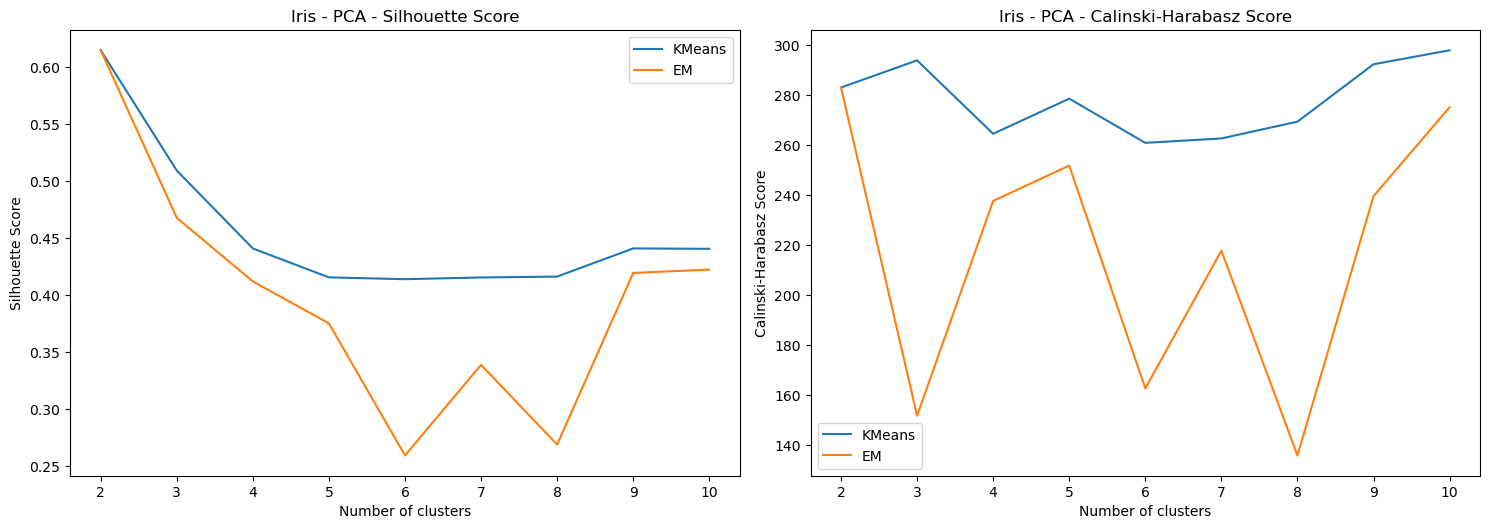

Optimal number of clusters for KMeans: 2
Optimal number of clusters for EM: 2

Clustering Iris dataset reduced by ICA


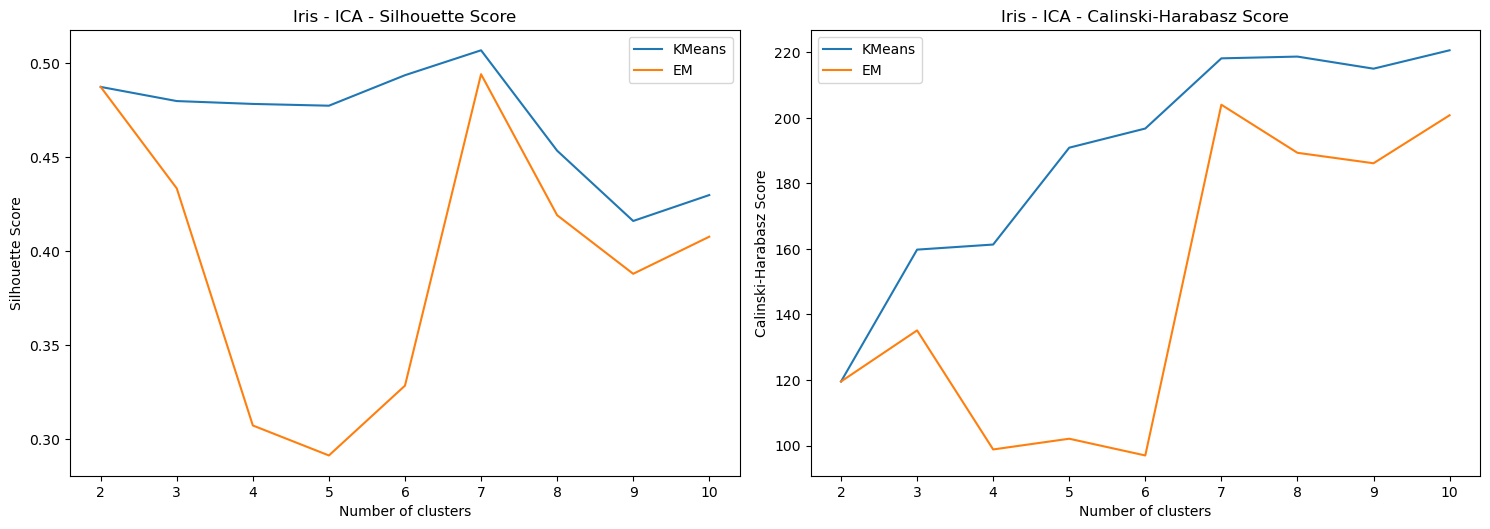

Optimal number of clusters for KMeans: 7
Optimal number of clusters for EM: 7

Clustering Iris dataset reduced by RP


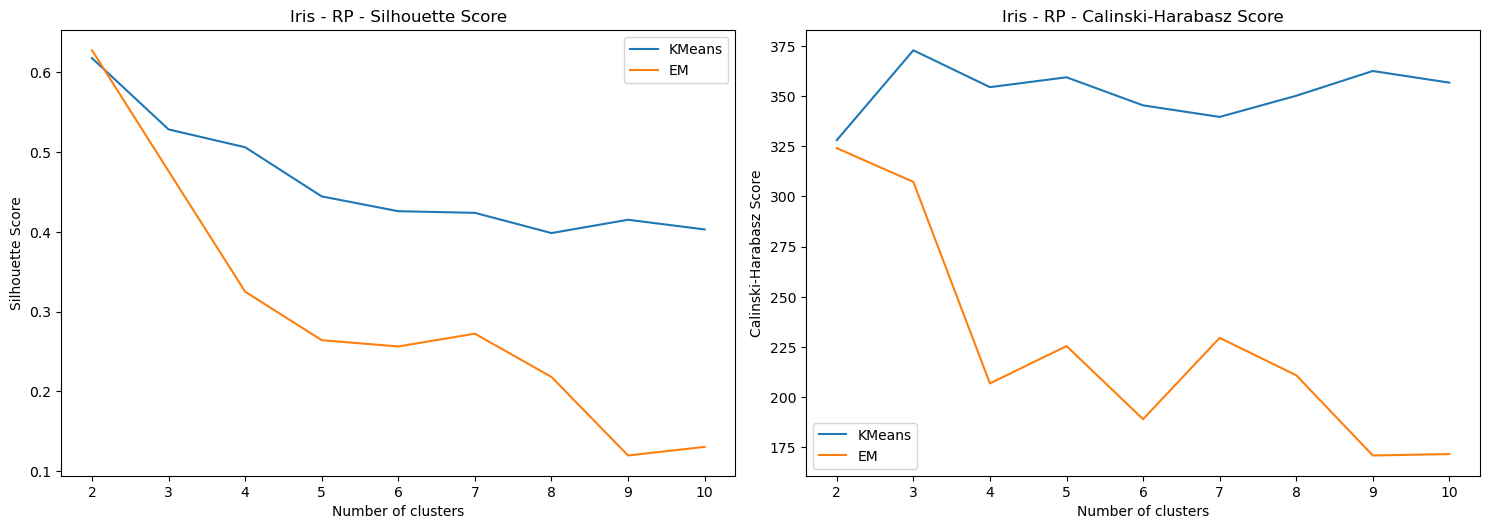

Optimal number of clusters for KMeans: 2
Optimal number of clusters for EM: 2

Clustering Diabetes dataset reduced by PCA


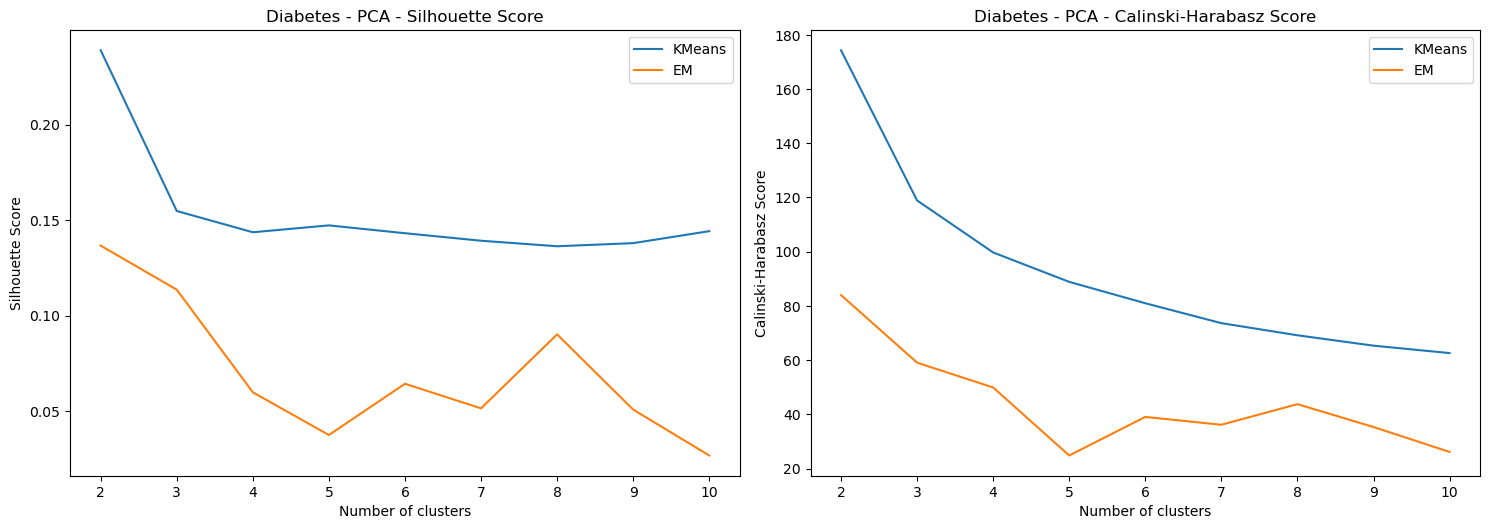

Optimal number of clusters for KMeans: 2
Optimal number of clusters for EM: 2

Clustering Diabetes dataset reduced by ICA


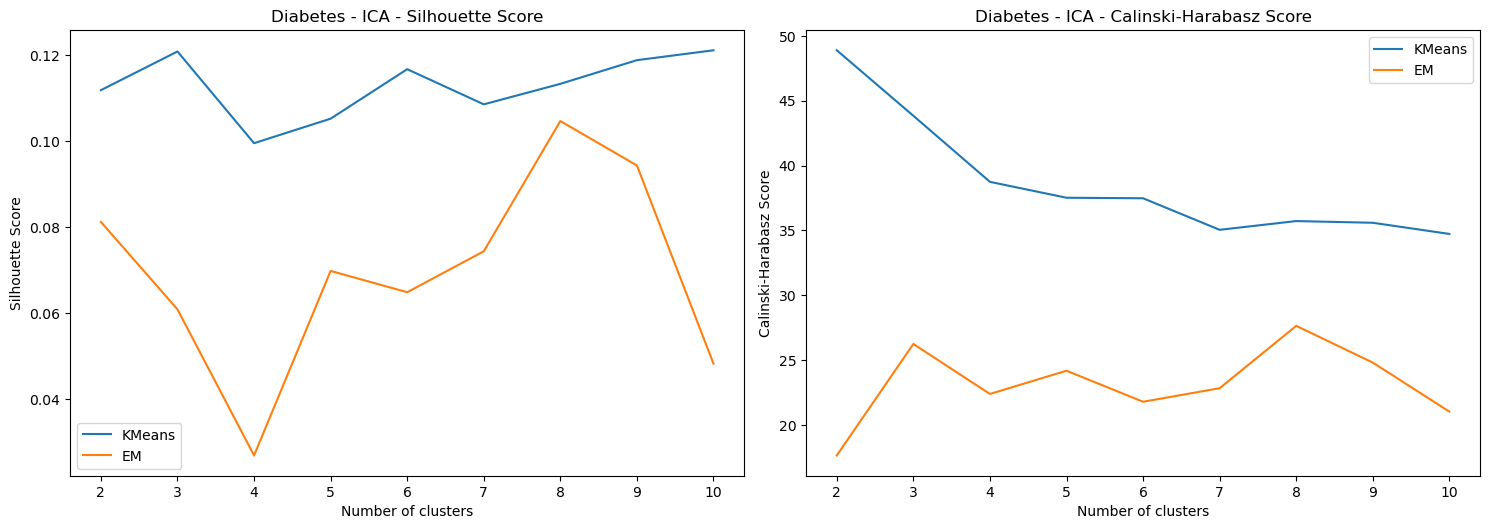

Optimal number of clusters for KMeans: 10
Optimal number of clusters for EM: 8

Clustering Diabetes dataset reduced by RP


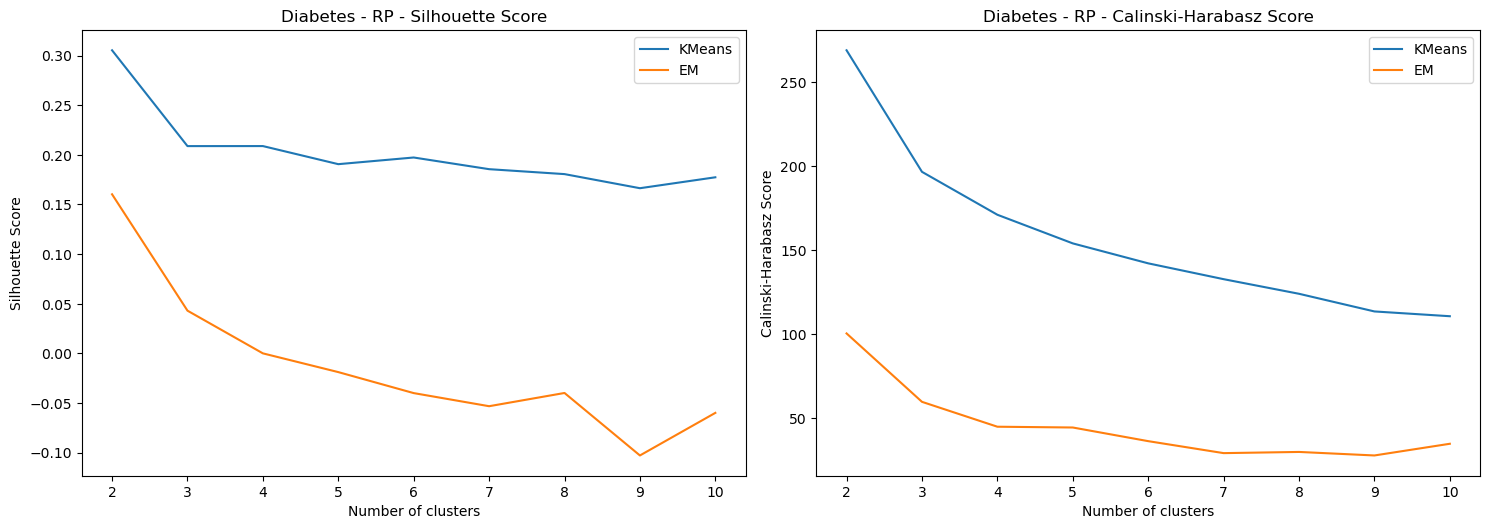

Optimal number of clusters for KMeans: 2
Optimal number of clusters for EM: 2


In [18]:
for (reduction, train), (dataset, method) in zip(
    [iris_pca, iris_ica, iris_rp, diabetes_pca, diabetes_ica, diabetes_rp],
    [
        ("Iris", "PCA"),
        ("Iris", "ICA"),
        ("Iris", "RP"),
        ("Diabetes", "PCA"),
        ("Diabetes", "ICA"),
        ("Diabetes", "RP"),
    ],
):
    print(f"\nClustering {dataset} dataset reduced by {method}")
    optimal_kmeans, optimal_EM = apply_clustering(train, f"{dataset} - {method}")
    kmeans = KMeans(n_clusters=optimal_kmeans, random_state=42)
    EM = GaussianMixture(n_components=optimal_EM, random_state=42)
    kmeans_labels = kmeans.fit_predict(train)
    EM_labels = EM.fit_predict(train)

In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import time

In [20]:
def train_and_evaluate_mlp(X_train, y_train, X_test, y_test, param_grid):
    mlp = MLPClassifier(max_iter=2000, random_state=42)
    n_classes = len(np.unique(y_train))
    scoring = "accuracy" if n_classes > 2 else "f1"
    grid_search = GridSearchCV(mlp, param_grid, n_jobs=-1, cv=5, scoring=scoring)
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time
    best_mlp = grid_search.best_estimator_
    y_pred = best_mlp.predict(X_test)
    print("Classification Report (NN)")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Training time: {training_time:.4f} seconds")
    print(f"Number of iterations: {best_mlp.n_iter_}")
    return best_mlp, training_time, best_mlp.n_iter_

In [21]:
def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator,
        X,
        y,
        cv=5,
        n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring="accuracy",
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.figure()
    plt.title(title)
    plt.xlabel("Training samples")
    plt.ylabel("Score")
    plt.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
    plt.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    plt.legend(loc="best")
    plt.grid()
    plt.show()

In [22]:
param_grid = {
    "hidden_layer_sizes": [(50,), (100,), (50, 50), (100, 50)],
    "activation": ["relu", "tanh"],
    "alpha": [0.0001, 0.001, 0.01],
    "learning_rate": ["constant", "adaptive"],
}


Neural Network on Iris dataset reduced by PCA
Classification Report (NN)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.92      0.85      0.88        13
           2       0.86      0.92      0.89        13

    accuracy                           0.93        45
   macro avg       0.92      0.92      0.92        45
weighted avg       0.93      0.93      0.93        45

Accuracy: 0.9333
Training time: 5.0428 seconds
Number of iterations: 447
Best parameters: {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 2000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 42, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 

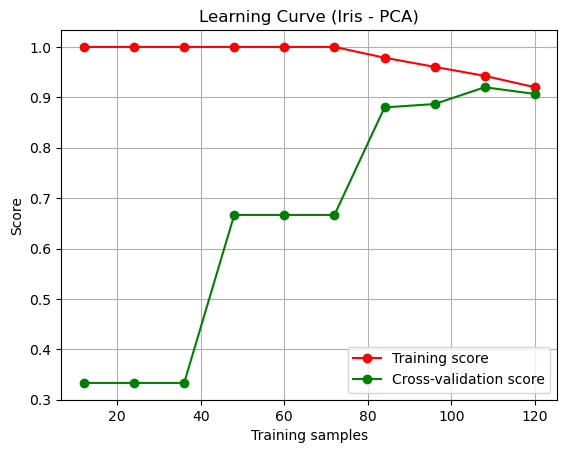


Neural Network on Iris dataset reduced by ICA
Classification Report (NN)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.92      0.85      0.88        13
           2       0.86      0.92      0.89        13

    accuracy                           0.93        45
   macro avg       0.92      0.92      0.92        45
weighted avg       0.93      0.93      0.93        45

Accuracy: 0.9333
Training time: 3.9794 seconds
Number of iterations: 206
Best parameters: {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 2000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 42, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose

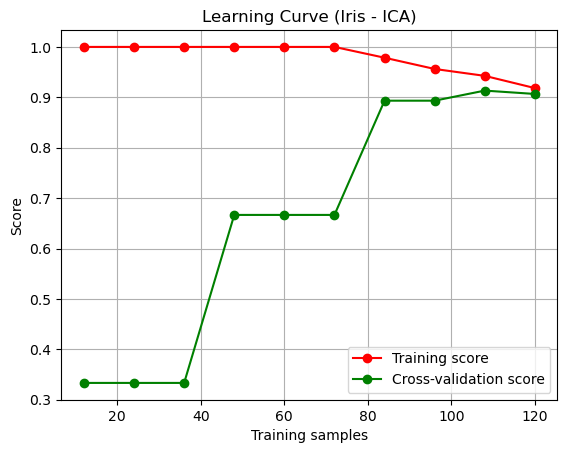


Neural Network on Iris dataset reduced by RP
Classification Report (NN)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Accuracy: 1.0000
Training time: 2.8263 seconds
Number of iterations: 599
Best parameters: {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 2000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 42, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': Fa

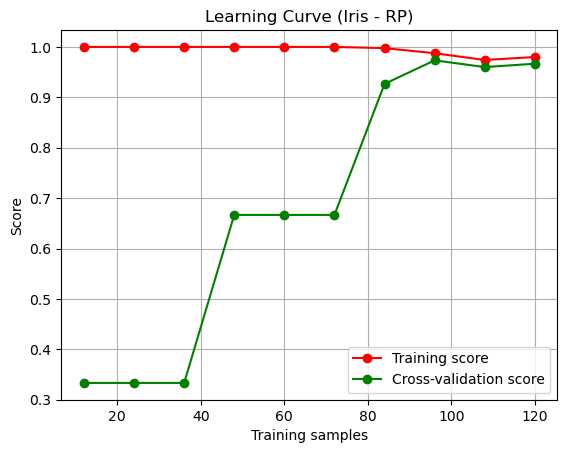

In [23]:
for (reduction, train_data), (dataset, method) in zip(
    [iris_pca, iris_ica, iris_rp], [("Iris", "PCA"), ("Iris", "ICA"), ("Iris", "RP")]
):
    print(f"\nNeural Network on {dataset} dataset reduced by {method}")
    y = iris.target
    X_train, X_test, y_train, y_test = train_test_split(
        train_data, y, test_size=0.3, random_state=42
    )
    best_mlp, training_time, n_iter = train_and_evaluate_mlp(
        X_train, y_train, X_test, y_test, param_grid
    )
    print(f"Best parameters: {best_mlp.get_params()}")
    plot_learning_curve(
        best_mlp, train_data, y, f"Learning Curve ({dataset} - {method})"
    )

In [24]:
def add_clustering_features(X):
    kmeans = KMeans(n_clusters=2, random_state=42)
    EM = GaussianMixture(n_components=2, random_state=42)
    kmeans_labels = kmeans.fit_predict(X)
    EM_labels = EM.fit_predict(X)
    return np.column_stack((X, kmeans_labels, EM_labels))

In [25]:
def compare_nn_performance(X_original, X_with_clusters, y, dataset_name):
    X_train_orig, X_test_orig, X_train_clust, X_test_clust, y_train, y_test = (
        train_test_split(X_original, X_with_clusters, y, test_size=0.3, random_state=42)
    )
    print(f"\nNeural Network on original {dataset_name} dataset")
    original_nn, original_time, original_iter = train_and_evaluate_mlp(
        X_train_orig, y_train, X_test_orig, y_test, param_grid
    )
    plot_learning_curve(
        original_nn, X_original, y, f"Learning Curve ({dataset_name} - Original)"
    )
    print(f"\nNeural Network on {dataset_name} dataset with clustering features")
    clustered_nn, clustered_time, clustered_iter = train_and_evaluate_mlp(
        X_train_clust, y_train, X_test_clust, y_test, param_grid
    )
    plot_learning_curve(
        clustered_nn,
        X_with_clusters,
        y,
        f"Learning Curve ({dataset_name} - With Clustering)",
    )
    print(f"Original Training Time: {original_time:.4f} seconds")
    print(f"Clustered Training Time: {clustered_time:.4f} seconds")
    print(f"Original Iterations: {original_iter}")
    print(f"Clustered Iterations: {clustered_iter}")

Processing Iris dataset

Neural Network on original Iris dataset
Classification Report (NN)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Accuracy: 1.0000
Training time: 3.4550 seconds
Number of iterations: 307


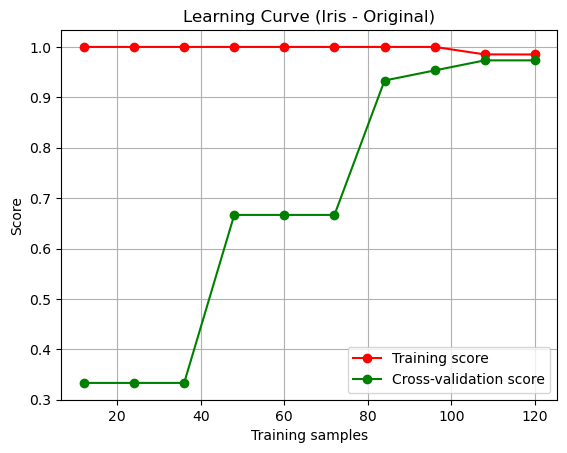


Neural Network on Iris dataset with clustering features
Classification Report (NN)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Accuracy: 1.0000
Training time: 3.5353 seconds
Number of iterations: 282


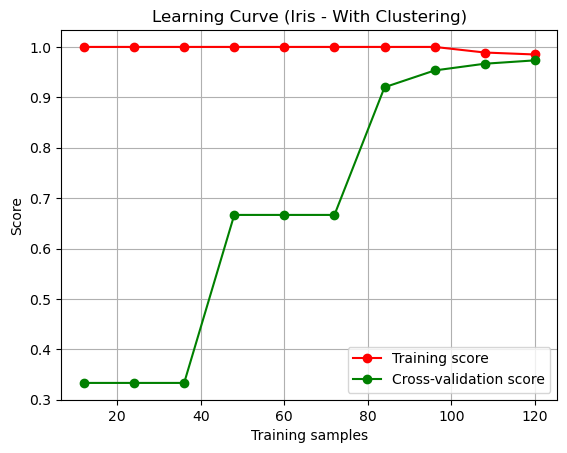

Original Training Time: 3.4550 seconds
Clustered Training Time: 3.5353 seconds
Original Iterations: 307
Clustered Iterations: 282


In [26]:
print("Processing Iris dataset")
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris.data)
iris_with_clusters = add_clustering_features(iris_scaled)
compare_nn_performance(iris_scaled, iris_with_clusters, iris.target, "Iris")